In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Similarities and outliers

* Unsupervised learning
* Similarity measures
  * Cosine similarity
  * Recommender systems
* Outlier detection

## Unsupervised learning

* Data without labels

## Similarity measures 

*What belongs together?*

or *how close are things?*

## Distance metric

What are we measuring?

Euclidean distance: $$d(x, y) = \sqrt{(x - y)^2}$$

In [2]:
def euclidean_distance(x, y):
    return math.sqrt(((x - y) ** 2).sum())

In [4]:
x = np.random.sample((10, ))
y = np.random.sample((10, ))

array([0.58732262, 0.7423677 , 0.24920553, 0.37039134, 0.79591521,
       0.52536411, 0.75520988, 0.0672212 , 0.48793289, 0.60459468])

In [5]:
x

array([0.58732262, 0.7423677 , 0.24920553, 0.37039134, 0.79591521,
       0.52536411, 0.75520988, 0.0672212 , 0.48793289, 0.60459468])

In [6]:
euclidean_distance(x, y)

1.3078255960998864

In [9]:
x = np.random.sample((10000, ))
y = np.random.sample((10000, ))

array([0.62582448, 0.67773879, 0.8709241 , ..., 0.68019563, 0.56814429,
       0.4320143 ])

In [10]:
euclidean_distance(x, y)

40.914779279661396

In [132]:
np.array([abs(x - y) for x, y in zip(np.random.sample((10000000, )), np.random.sample((10000000,)))]).mean()

0.3333995353457846

## Cosine similarity

$$\text{similarity} = \cos(\theta) = {\mathbf{A} \cdot \mathbf{B} \over \|\mathbf{A}\| \|\mathbf{B}\|} = \frac{ \sum\limits_{i=1}^{n}{A_i  B_i} }{ \sqrt{\sum\limits_{i=1}^{n}{A_i^2}}  \sqrt{\sum\limits_{i=1}^{n}{B_i^2}} }$$

## Cosine

![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/TrigFunctionDiagram.svg/589px-TrigFunctionDiagram.svg.png)


In [11]:
math.cos(0)

1.0

In [12]:
math.cos(1)

0.5403023058681398

In [13]:
math.cos(math.pi / 2)

6.123233995736766e-17

In [14]:
math.cos(math.pi)

-1.0

## Dot product


$$\mathbf{a}\cdot\mathbf{b}=\left\|\mathbf{a}\right\|\left\|\mathbf{b}\right\|\cos\theta$$

## Cosine similarity

$$\text{similarity} = \cos(\theta) = {\mathbf{A} \cdot \mathbf{B} \over \|\mathbf{A}\| \|\mathbf{B}\|} = \frac{ \sum\limits_{i=1}^{n}{A_i  B_i} }{ \sqrt{\sum\limits_{i=1}^{n}{A_i^2}}  \sqrt{\sum\limits_{i=1}^{n}{B_i^2}} }$$

In [15]:
x.dot(y) / (np.linalg.norm(x) * np.linalg.norm(y))

0.7491667496749115

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([x], [y])

array([[0.74916675]])

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

titles = [
    'A New Hope',
    'The Empire Strikes Back',
    'Return of the Jedi',
    'The Phantom Menace',
    'Attack of the Clones',
    'Revenge of the Sith',
    'The Force Awakens',
    'A Star Wars Story',
    'The Last Jedi',
    ]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(titles)
X[0].todense()

matrix([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [26]:
cosine_similarity(X)

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.25      , 0.28867513, 0.25      ,
        0.25      , 0.28867513, 0.        , 0.28867513],
       [0.        , 0.25      , 1.        , 0.28867513, 0.5       ,
        0.5       , 0.28867513, 0.        , 0.57735027],
       [0.        , 0.28867513, 0.28867513, 1.        , 0.28867513,
        0.28867513, 0.33333333, 0.        , 0.33333333],
       [0.        , 0.25      , 0.5       , 0.28867513, 1.        ,
        0.5       , 0.28867513, 0.        , 0.28867513],
       [0.        , 0.25      , 0.5       , 0.28867513, 0.5       ,
        1.        , 0.28867513, 0.        , 0.28867513],
       [0.        , 0.28867513, 0.28867513, 0.33333333, 0.28867513,
        0.28867513, 1.        , 0.        , 0.33333333],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        ],


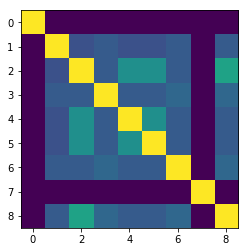

In [27]:
plt.imshow(cosine_similarity(X))

## Outlier detections 

Detects which datapoints are outside the norm.

Useful when dataset contains problematic data.

## Outlier trimming

Step 1: Figure out what is 'abnormal'

In [28]:
import pandas as pd

df = pd.read_csv('science.csv')

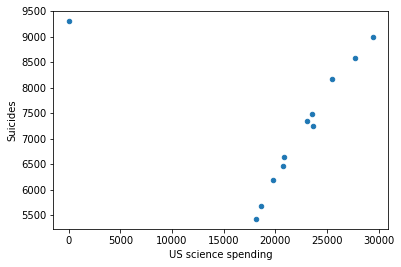

In [29]:
df.plot.scatter(x=1, y=2)

Step 2: Find a way to narrow in on 'normal'

In [31]:
from sklearn.neighbors import LocalOutlierFactor

detector = LocalOutlierFactor()
detector.fit_predict(df)

/home/jens/.virtualenvs/keras/lib/python3.6/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/home/jens/.virtualenvs/keras/lib/python3.6/site-packages/sklearn/neighbors/lof.py:253: UserWarning: n_neighbors (20) is greater than the total number of samples (12). n_neighbors will be set to (n_samples - 1) for estimation.
  % (self.n_neighbors, n_samples))


array([-1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [33]:
detector = LocalOutlierFactor(n_neighbors=10)
outliers = detector.fit_predict(df)
df[outliers > 0]

/home/jens/.virtualenvs/keras/lib/python3.6/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


,Year,US science spending,Suicides
0,1999,18079,5427
1,2000,18594,5688
2,2001,19753,6198
3,2002,20734,6462
4,2003,20831,6635
5,2004,23029,7336
6,2005,23597,7248
8,2007,25525,8161
9,2008,27731,8578
10,2009,29449,9000


## Exercise

Actually, autoencoders are great outlier detectors because they remove noise.

Follow this guide to build your own autoencoder outlier detector for credit card fraud: https://medium.com/@curiousily/credit-card-fraud-detection-using-autoencoders-in-keras-tensorflow-for-hackers-part-vii-20e0c85301bd